# Problema
Nos van a dar muchos pedazos de un genoma (de varios genomas iguales de hecho) y tenemos que encontrar la forma de unirlos todos. <br> 
Es decir, hay que encontrar una cadena (la cadena mas corta) que contiene a todos los pedazos como subcadenas. <br> <br>
En el primer problema nos van a dar 1000 lecturaz al azar cada una de 100 nucleotidos de un gen con un total de 5386 nucloetidos. 
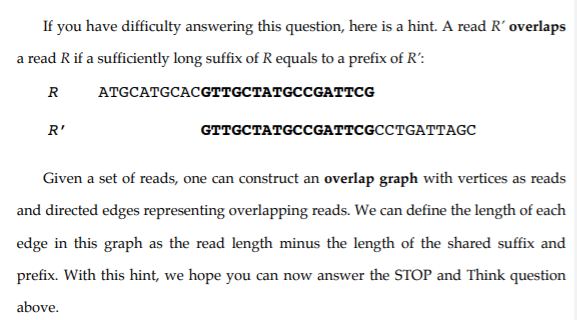

### Ejemplo de Overlap Graph
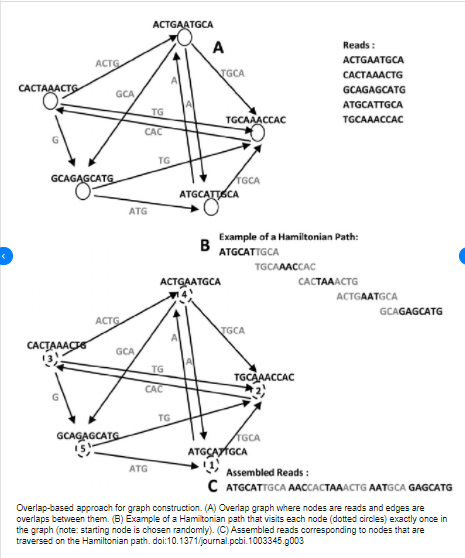

Algunas parejas de Strings tienen varios overlaps de prefijo con sufijo de distintas longitudes, por lo que supongo que habr'a que agarrar la m'as grande.
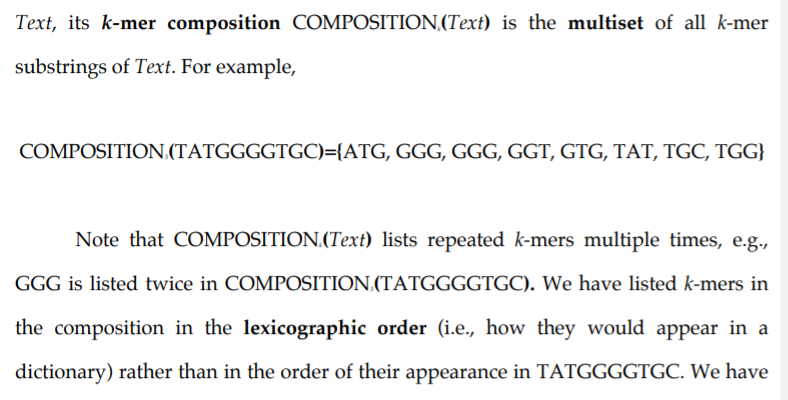

### String Reconstruction Problem
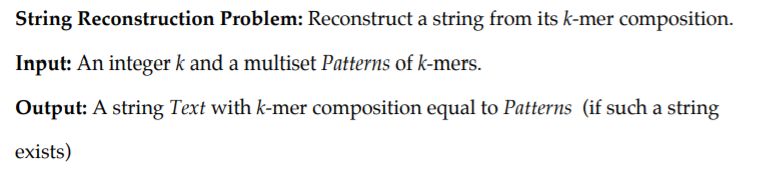

In [ ]:
# python3
import sys
import numpy as np
from copy import deepcopy


class SuffixArray:
    '''
    Build suffix array of the string text and
    return a list result of the same length as the text
    such that the value result[i] is the index (0-based)
    in text where the i-th lexicographically smallest
    suffix of text starts.
    '''
    def __init__(self, text):
        self.order = self.buildSuffixArray(text)
    
    def _input(self):
        self.text = sys.stdin.readline().strip()

    def sortCharacters(self, S):
        l = len(S)
        order = [0] * l
        count = dict()
        for i in range(l):
            count[S[i]] = count.get(S[i], 0) + 1
        charList = sorted(count.keys())
        prevChar = charList[0]
        for char in charList[1:]:
            count[char] += count[prevChar]
            prevChar = char
        for i in range(l-1, -1, -1):
            c = S[i]
            count[c] = count[c] - 1
            order[count[c]] = i
        return order

    def computeCharClasses(self, S, order):
        l = len(S)
        charClass = [0] * l
        charClass[order[0]] = 0
        for i in range(1, l):
            if S[order[i]] != S[order[i-1]]:
                charClass[order[i]] = charClass[order[i-1]] + 1
            else:
                charClass[order[i]] = charClass[order[i-1]]
        return charClass        
    
    def sortDoubled(self, S, L, order, _class):
        sLen = len(S)
        count = [0] * sLen
        newOrder = [0] * sLen
        for i in range(sLen):
            count[_class[i]] += 1
        for j in range(1, sLen):
            count[j] += count[j-1]
        for i in range(sLen-1, -1, -1):
            start = (order[i]-L+sLen) % sLen
            cl = _class[start]
            count[cl] -= 1
            newOrder[count[cl]] = start
        return newOrder
    
    def updateClasses(self, newOrder, _class, L):
        n = len(newOrder)
        newClass = [0] * n
        newClass[newOrder[0]] = 0
        for i in range(1, n):
            curr = newOrder[i]
            prev = newOrder[i-1]
            mid = curr + L
            midPrev = (prev + L) % n
            if _class[curr] != _class[prev] or _class[mid] != _class[midPrev]:
                newClass[curr] = newClass[prev] + 1
            else:
                newClass[curr] = newClass[prev]
        return newClass
    
    def buildSuffixArray(self, S):
        sLen = len(S)
        order = self.sortCharacters(S)
        _class = self.computeCharClasses(S, order)
        L = 1
        while L < sLen:
            order = self.sortDoubled(S, L, order, _class)
            _class = self.updateClasses(order, _class, L)
            L = 2 * L
        return order

class Assembling1:
    # Genome assembly from error-free reads
    # assembling1
    def __init__(self):
        #reads lee toda la informacion
        reads = self.readData()
        genome = self.assembly(reads)     
        print(genome)   

    def readData(self):
        #la funcion readd data lee la informacion que se entra
        return list(set(sys.stdin.read().strip().split()))

    def bwtFromSuffixArray(self, text, order, alphabet = ['$', 'A', 'C', 'G', 'T']):
        #elkalksndf
        l = len(text)
        bwt = [''] * l
        for i in range(l):
            bwt[i] = text[(order[i]+l-1)%l]

        counts = dict()
        starts = dict()
        for char in alphabet:
            counts[char] = [0] * (l + 1)
        for i in range(l):
            currChar = bwt[i]
            for char, count in counts.items():
                counts[char][i+1] = counts[char][i]
            counts[currChar][i+1] += 1
        currIndex = 0
        for char in sorted(alphabet):
            starts[char] = currIndex
            currIndex += counts[char][l]
        return bwt, starts, counts

    def findLongestOverlap(self, text, patterns, k = 12):
        order = SuffixArray(text).order
        bwt, starts, counts = self.bwtFromSuffixArray(text, order)        
        l = len(text)-1

        occs = dict()
        for i, p in enumerate(patterns):
            pattern = p[:k]
            top = 0
            bottom = len(bwt) - 1
            currIndex = len(pattern) - 1
            while top <= bottom:
                if currIndex >= 0:
                    symbol = pattern[currIndex]
                    currIndex -= 1
                    if counts[symbol][bottom+1] - counts[symbol][top] > 0:
                        top = starts[symbol] + counts[symbol][top]
                        bottom = starts[symbol] + counts[symbol][bottom+1] - 1
                    else:
                        break
                else:
                    for j in range(top, bottom + 1):
                        if not order[j] in occs:
                            occs[order[j]] = []
                        occs[order[j]].append(i)
                    break
        overlap = 0
        for pos, iList in sorted(occs.items()):
            for i in iList:
                if text[pos:-1] == patterns[i][:l-pos]:
                    return i, l-pos
        return i, overlap

    def assembly(self, reads):
        genome = reads[0]
        currInd = 0
        firstRead = reads[currInd]
        while True:
            currRead = reads[currInd]
            if 1 == len(reads):
                break
            del reads[currInd]
            currInd, overlap = self.findLongestOverlap(currRead+'$', reads)
            genome += reads[currInd][overlap:]
        currInd, overlap = self.findLongestOverlap(reads[0]+'$', [firstRead])
        if overlap > 0:
            return genome[:-overlap]
        else:
            return genome

if __name__ == '__main__':
    Assembling1()

In [5]:
import sys
import numpy as np
from copy import deepcopy


class Assembling1:
    # Genome assembly from error-free reads
    # assembling1
    def __init__(self):
        #reads lee toda la informacion
        reads = self.readData()
        print(reads)   

    def readData(self):
        #la funcion readd data lee la informacion que se entra
        return list(set(sys.stdin.read().strip().split()))
Assembling1()

[]
